In [1]:
import torch
# import libraries
from managers.shiyongren import Manager
from models.shiyongren import D2NNmodel
from helper import *

In [2]:
n_layers = 4
n_size_per_layer = 400
distance_list = torch.tensor([29.5, 29.5, 29.5, 71]) * 1e-3
pixel_pitch = 8e-6
lambd_list = torch.tensor([491e-9, 660e-9])
n_multiplexing = len(lambd_list)
n_padding = 200
lr = 2e-2
batch_size = 12
whether_load_model = True
load_model_name = 'saved_model/shiyongren_4.pth'
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
load_dic = [
    {'path':'input_field_lamda_12.mat', 'vari_name':'U_load'},
    {'path':'output_filed_lamda_12.mat', 'vari_name':'Y_load'}
]
dataloaders = shiyong_loader(load_dic, batch_size)

In [4]:
model = D2NNmodel(pixel_pitch, distance_list, n_padding, device, lambd_list, n_size_per_layer, 0)

In [5]:
# loss_fn = convex_loss()
loss_fn = torch.nn.MSELoss(reduction='sum')
# loss_fn = mse_loss()
optimizer = optim.Adam(model.parameters(), lr=lr)
manager = Manager(model, loss_fn, optimizer, n_multiplexing)
manager.set_loaders(dataloaders, None)
# tracking, fig = manager.lr_range_test(start_lr = 1e-4, end_lr=1e2, num_iter=200)
if whether_load_model:
    manager.load_checkpoint(load_model_name, None)

In [6]:
manager.train(1000)

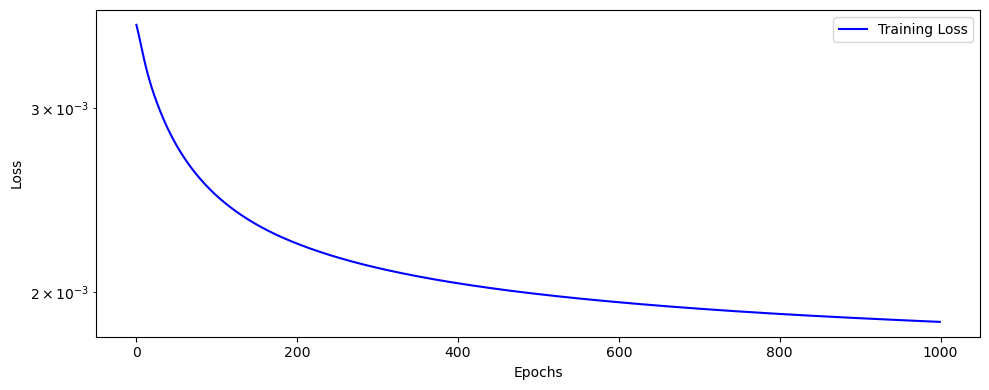

In [7]:
fig_l = manager.plot_losses()

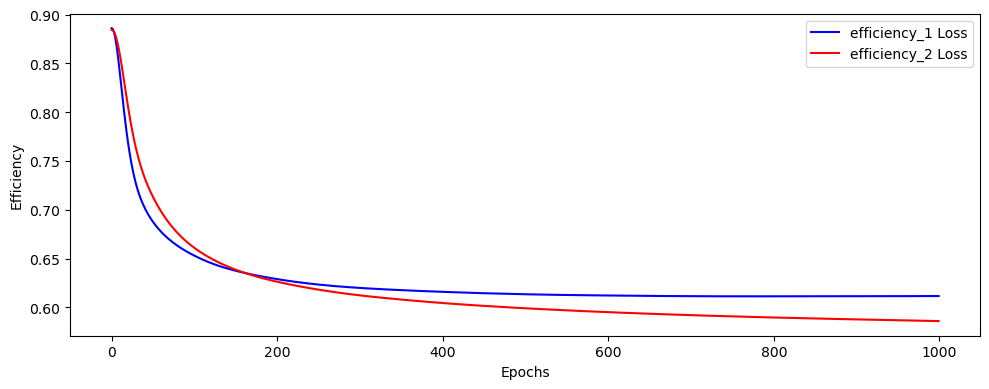

In [8]:
fig_e = manager.plot_efficiency()

In [14]:
manager.eff(30, False)

0.18132032
0.21548073


In [10]:
# manager.adjust_target(9, 0.7e-1)

In [11]:
# manager.save_checkpoint('saved_model/shiyongren_tem_1.pth')

In [12]:
# layers_name = ['modulation_1', 'modulation_2', 'modulation_3', 'modulation_4']
# fig_voltage = manager.visualize_voltage_mask(layers_name)

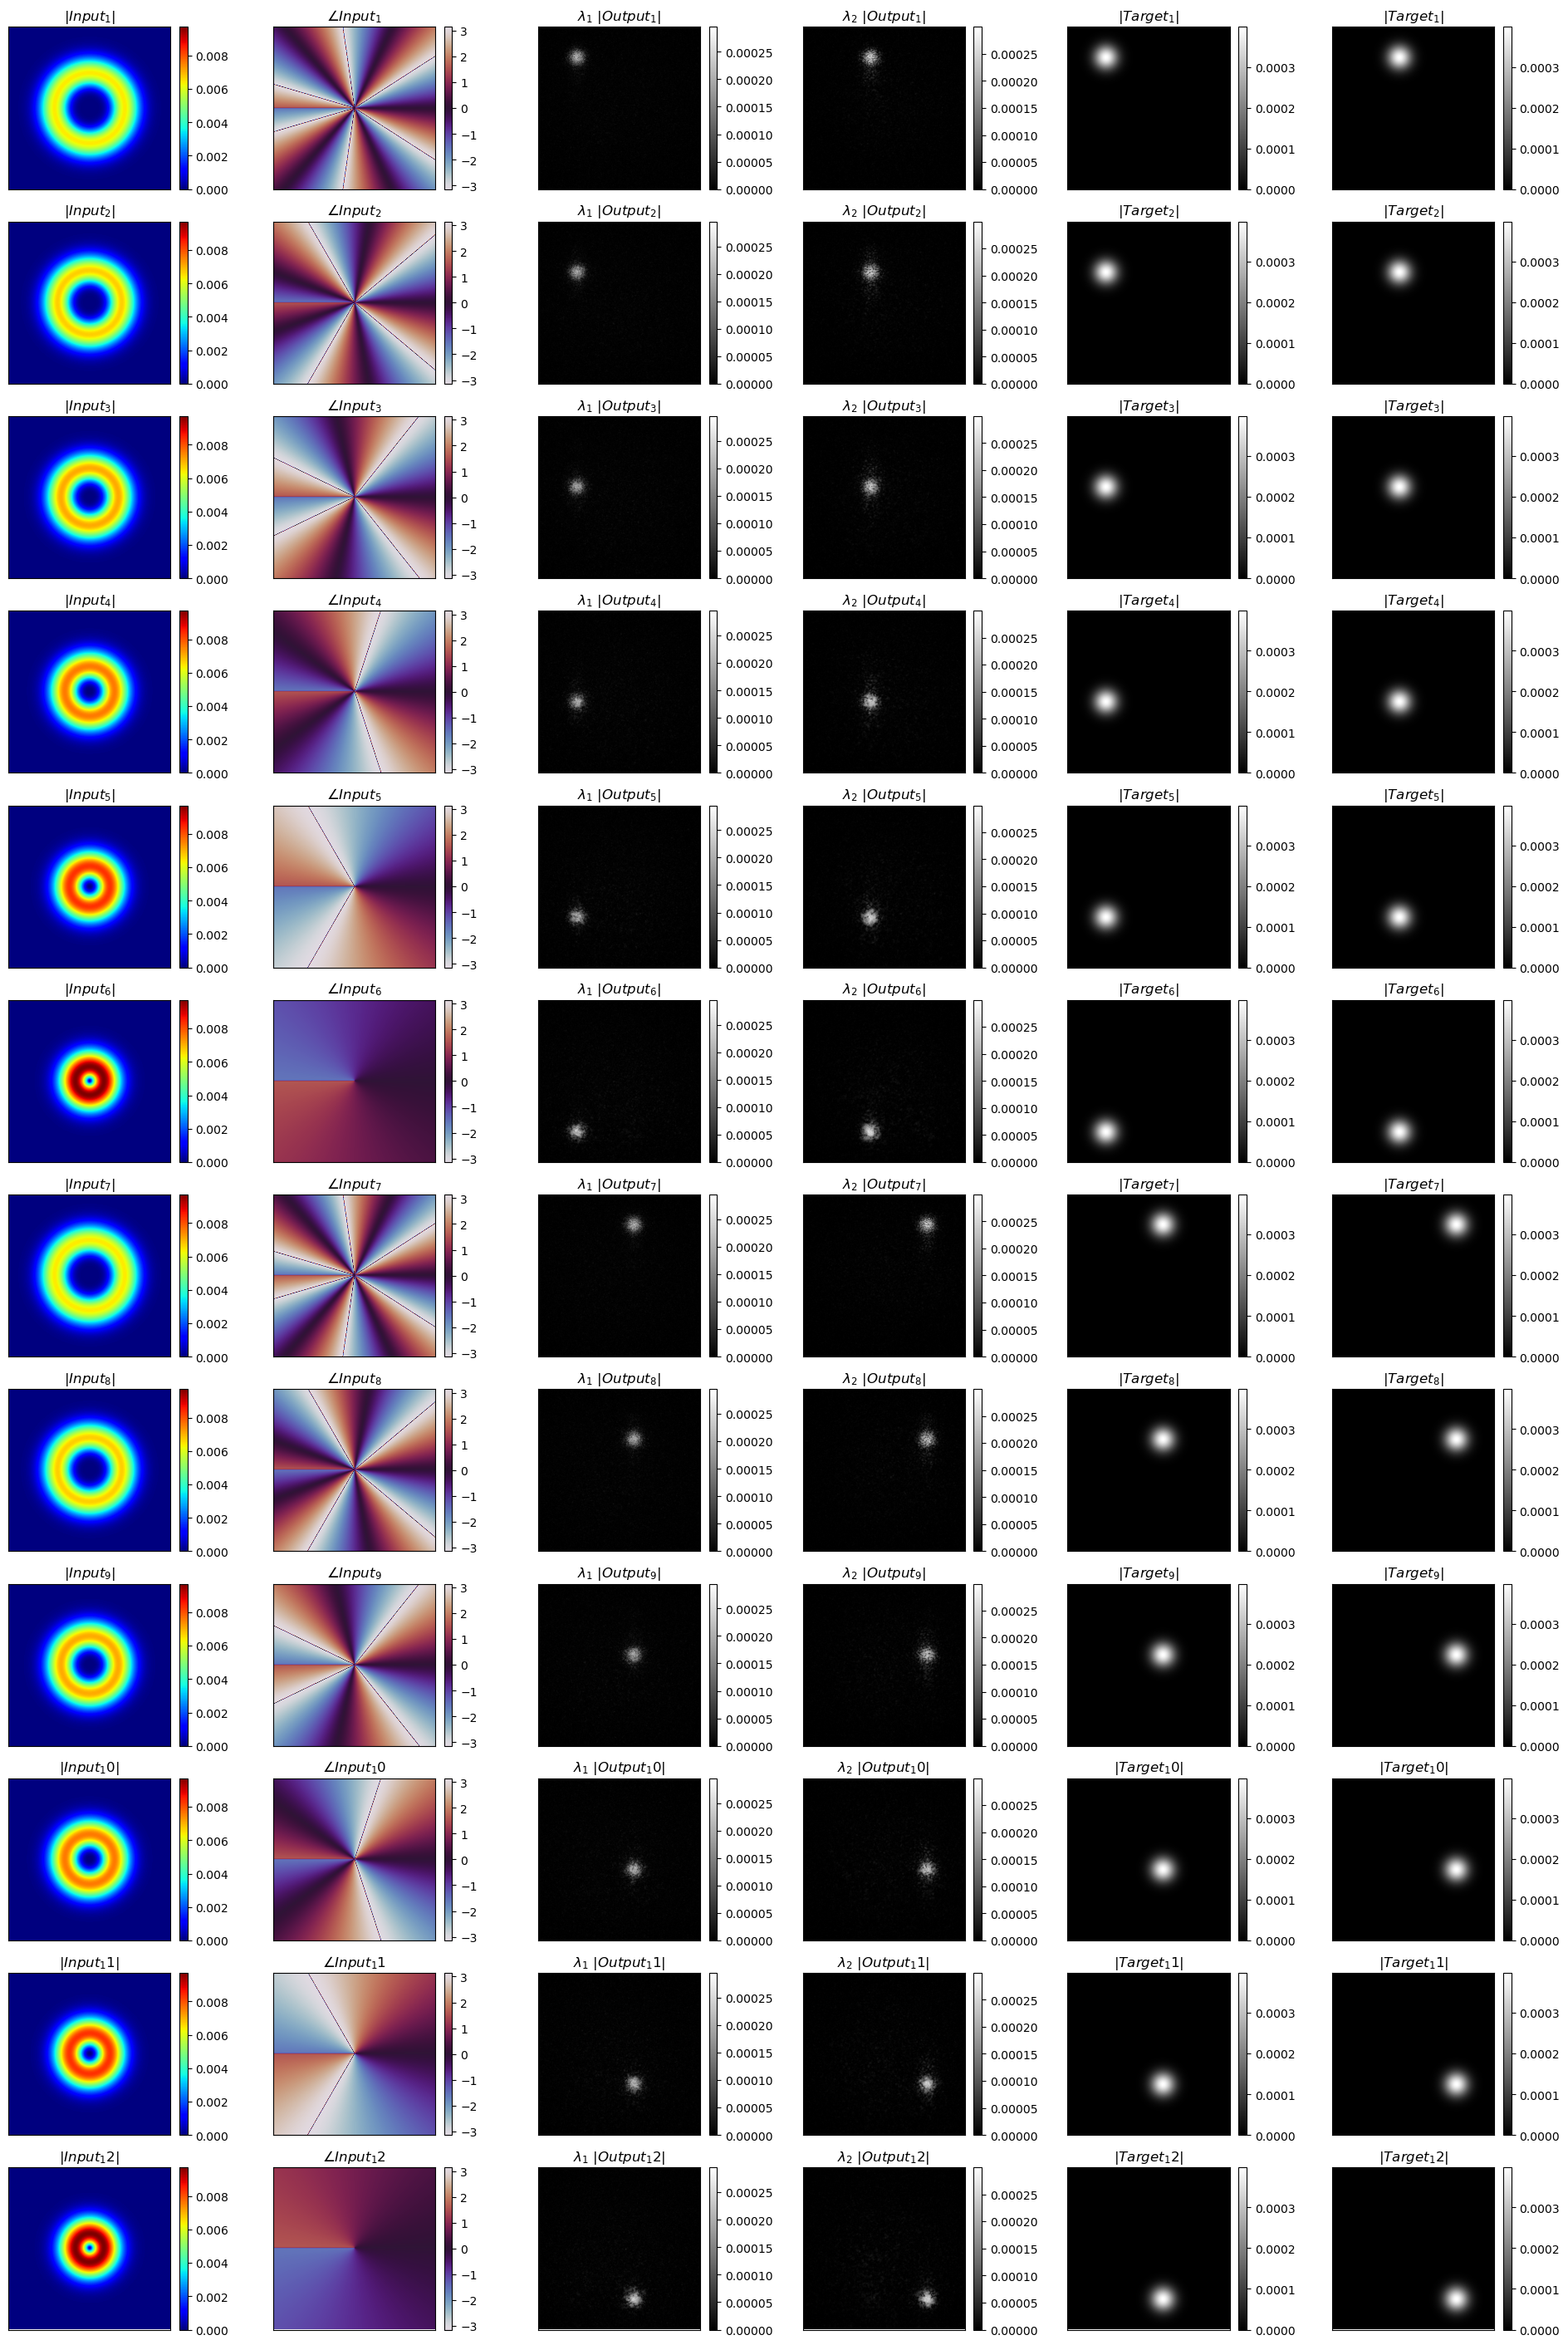

In [13]:
# A_hat = manager.get_transform_tensor(A)
fig_1 = manager.figure_1(dataloaders)

In [ ]:
# To be continued ...

In [ ]:
fig, ax = plt.subplots()
ax.imshow(gaussians.sum(dim=0), cmap='gray')
plt.show()